In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#IMPORTING THE DATASET
ds1 = pd.read_csv('globalpp.csv')
ds1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECKING FOR NULL VALUES
ds1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
ds1=ds1.drop(columns=['country','other_fuel1','other_fuel2','other_fuel3','owner','url','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)
ds1

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#CHECHING FOR THE DATA TYPES OF EACH COLUMN
ds1.dtypes

country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
source                     object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [10]:
ds1.nunique()

country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
source                    191
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [11]:
ds1=ds1.drop(columns=['country_long','latitude','longitude','year_of_capacity_data','generation_data_source'],axis=1)
ds1

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,Coal,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [12]:
#CHECKING FOR NULL VALUES
ds1.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [16]:
print(ds1['commissioning_year'].mode())

0    2015.0
Name: commissioning_year, dtype: float64


In [22]:
#HANDLING NULL VALUES
#Applying Mode imputation technique to replace null values in "commissioning_year" coulmn
ds1['commissioning_year'].fillna(ds1['commissioning_year'].mode()[0],inplace=True)

In [18]:
ds1['commissioning_year'] = ds1['commissioning_year'].astype(int)

In [19]:
print(ds1['geolocation_source'].mode())

0    WRI
Name: geolocation_source, dtype: object


In [21]:
#HANDLING NULL VALUES
#Applying Mode imputation technique to replace null values in "geolocation_source" coulmn
ds1['geolocation_source'].fillna(ds1['geolocation_source'].mode()[0],inplace=True)

In [23]:
#HANDLING NULL VALUES
#Applying Mean imputation technique to replace null values in "generation_gwh" coulmn
ds1['generation_gwh_2014'].fillna(ds1['generation_gwh_2014'].mean(),inplace=True)
ds1['generation_gwh_2015'].fillna(ds1['generation_gwh_2015'].mean(),inplace=True)
ds1['generation_gwh_2016'].fillna(ds1['generation_gwh_2016'].mean(),inplace=True)
ds1['generation_gwh_2017'].fillna(ds1['generation_gwh_2017'].mean(),inplace=True)
ds1['generation_gwh_2018'].fillna(ds1['generation_gwh_2018'].mean(),inplace=True)

In [24]:
#CHECKING FOR NULL VALUES
ds1.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [25]:
#CHECKING FOR THE COUNT OF EVERY VALUES IN EACH COULMNS
for i in ds1.columns: 
    print(ds1[i].value_counts())

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
2015    408
2013     25
2012     23
2016     19
2010     18
       ... 
1946      1

In [26]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    int32  
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(6), int32(1), object(5)
memory usage: 81.6+ KB


# STATISTICAL ANALYSIS

In [27]:
ds1.describe()

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,2004.594267,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,15.734928,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,2014.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,2015.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- There are no null values in the dataset
- The mean is exactly equal to the median in most of the columns and hence there is no chance for skewness
- There is a huge difference between 75% and the maximum value and hence outliers will be there

capacity_mw               AxesSubplot(0.125,0.747241;0.168478x0.132759)
commissioning_year     AxesSubplot(0.327174,0.747241;0.168478x0.132759)
generation_gwh_2014    AxesSubplot(0.529348,0.747241;0.168478x0.132759)
generation_gwh_2015    AxesSubplot(0.731522,0.747241;0.168478x0.132759)
generation_gwh_2016       AxesSubplot(0.125,0.587931;0.168478x0.132759)
generation_gwh_2017    AxesSubplot(0.327174,0.587931;0.168478x0.132759)
generation_gwh_2018    AxesSubplot(0.529348,0.587931;0.168478x0.132759)
dtype: object

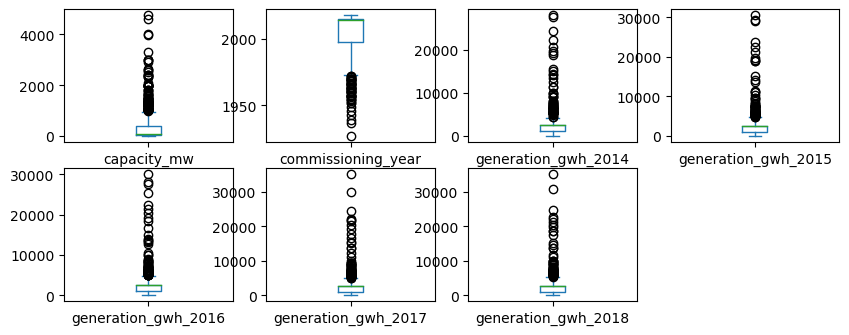

In [32]:
#CHECKING FOR OUTLIERS
ds1.plot(kind='box',subplots=True,figsize=(10,10),layout=(5,4))

In [33]:
#CHECKING FOR OUTLIERS
from scipy.stats import zscore
f=ds1[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(f))
z

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,
WRI1020239,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
WRI1019881,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
WRI1026669,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
IND0000001,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
IND0000002,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...
IND0000513,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
WRI1026222,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
WRI1026776,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [34]:
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 209, 209, 209,
       209, 209, 308, 308, 308, 308, 308, 364, 364, 364, 364, 364, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 648, 648, 648, 648,
       648, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695, 721, 721,
       721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 786,
       786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880, 880,
       880], dtype=int64), array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))


In [35]:
#REMOVING OUTLIERS
ds11=ds1[(z<3).all(axis=1)]
ds11

,name,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,,,,,,,
WRI1020239,ACME Solar Tower,2.5,Solar,2011,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
WRI1019881,ADITYA CEMENT WORKS,98.0,Coal,2015,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
WRI1026669,AES Saurashtra Windfarms,39.2,Wind,2015,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
IND0000001,AGARTALA GT,135.0,Gas,2004,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
IND0000002,AKALTARA TPP,1800.0,Coal,2015,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,YERMARUS TPP,1600.0,Coal,2016,Central Electricity Authority,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
WRI1026222,Yelesandra Solar Power Plant,3.0,Solar,2015,Karnataka Power Corporation Limited,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
WRI1026776,Yelisirur wind power project,25.5,Wind,2015,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [36]:
#CHECKING FOR SKEWNESS
ds11.skew()

capacity_mw            2.225265
commissioning_year    -1.719215
generation_gwh_2014    1.507397
generation_gwh_2015    1.371397
generation_gwh_2016    1.388951
generation_gwh_2017    1.295420
generation_gwh_2018    1.424268
dtype: float64

In [38]:
#REMOVING SKEWNESS USING CUBEROOT METHOD
ds11[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = np.cbrt(ds11[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
ds11.skew()

capacity_mw            2.225265
commissioning_year    -1.719215
generation_gwh_2014   -1.159384
generation_gwh_2015   -1.043374
generation_gwh_2016   -0.993111
generation_gwh_2017   -0.994404
generation_gwh_2018   -0.956111
dtype: float64

In [39]:
#SEPERATING CATEGORICAL AND NUMERICAL COLUMNS
cat_col=[]
num_col=[]
for i in ds1.dtypes.index:
    if ds1.dtypes[i]=="object":
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['name', 'primary_fuel', 'source', 'geolocation_source']
['capacity_mw', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [40]:
# LABEL ENCODING TECHNIQUE
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    ds11[i]=le.fit_transform(ds11[i].astype(str))
ds11

,name,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,,,,,,,,,,,
WRI1020239,0,2.5,6,2011,109,1,13.447576,13.440944,13.513816,13.657969,13.752106
WRI1019881,1,98.0,1,2015,174,2,13.447576,13.440944,13.513816,13.657969,13.752106
WRI1026669,2,39.2,7,2015,21,2,13.447576,13.440944,13.513816,13.657969,13.752106
IND0000001,3,135.0,2,2004,22,2,8.516872,9.449397,9.604586,8.723154,8.555526
IND0000002,4,1800.0,1,2015,22,2,14.479241,18.086385,18.413278,17.528476,19.380155
...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,885,1600.0,1,2016,22,2,13.447576,0.998289,6.158697,9.529548,8.821590
WRI1026222,886,3.0,6,2015,77,0,13.447576,13.440944,13.513816,13.657969,13.752106
WRI1026776,887,25.5,7,2015,21,2,13.447576,13.440944,13.513816,13.657969,13.752106


CHECKING FOR CORRELATION

In [41]:
ds11.corr()

,name,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.037346,0.046055,-0.043445,-0.012299,0.034765,0.045617,0.022591,0.020032,0.037820,0.020412
capacity_mw,0.037346,1.000000,-0.396227,0.003580,-0.264880,0.226222,0.189290,0.209271,0.268527,0.296011,0.302748
primary_fuel,0.046055,-0.396227,1.000000,0.163689,0.045067,-0.480959,0.079576,0.082509,0.068221,0.078411,0.073140
commissioning_year,-0.043445,0.003580,0.163689,1.000000,0.322258,-0.259750,0.304077,0.320817,0.353374,0.320405,0.319646
source,-0.012299,-0.264880,0.045067,0.322258,1.000000,-0.503935,0.202014,0.212134,0.212592,0.210327,0.213461
geolocation_source,0.034765,0.226222,-0.480959,-0.259750,-0.503935,1.000000,-0.162516,-0.170657,-0.171026,-0.169203,-0.171725
generation_gwh_2014,0.045617,0.189290,0.079576,0.304077,0.202014,-0.162516,1.000000,0.844058,0.806277,0.725067,0.746208
generation_gwh_2015,0.022591,0.209271,0.082509,0.320817,0.212134,-0.170657,0.844058,1.000000,0.897825,0.777956,0.796456
generation_gwh_2016,0.020032,0.268527,0.068221,0.353374,0.212592,-0.171026,0.806277,0.897825,1.000000,0.878322,0.889761
generation_gwh_2017,0.037820,0.296011,0.078411,0.320405,0.210327,-0.169203,0.725067,0.777956,0.878322,1.000000,0.931809


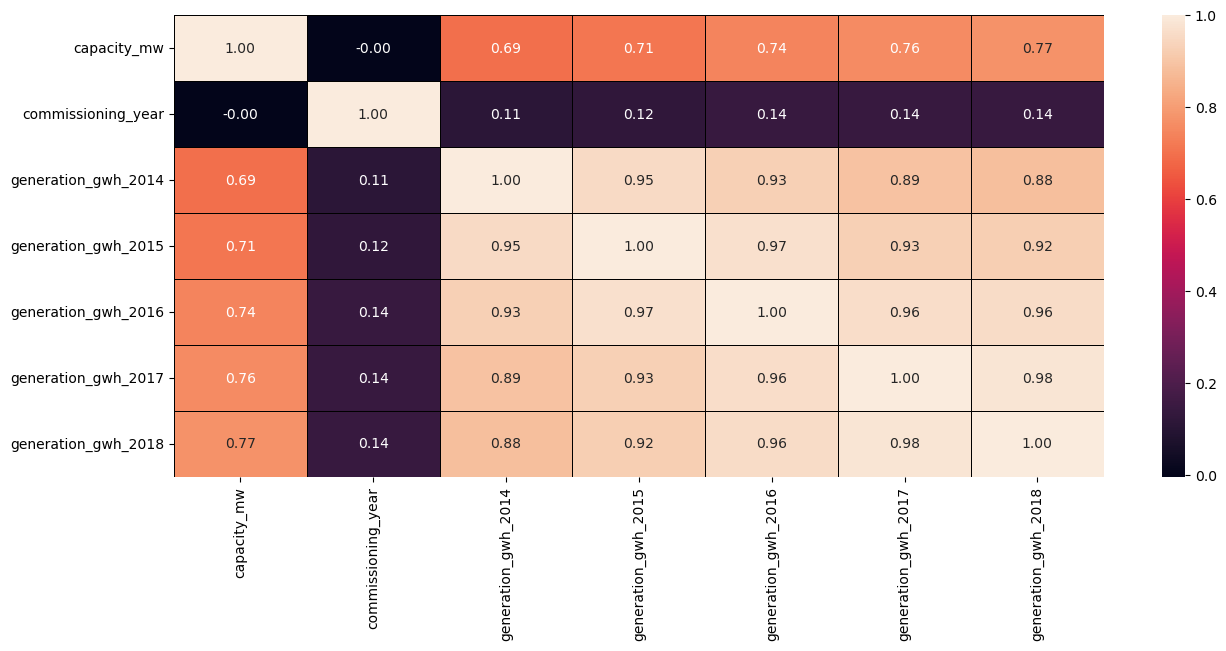

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(ds1.corr(),annot=True,linewidths=0.6,linecolor='black',fmt='0.2f')
plt.show()

In [43]:
#SEPERATING INDEPENDENT VARIABLES AND TARGET
x1 = ds11.drop('capacity_mw',axis=1)
y1 = ds11['capacity_mw']
print(x1)

            name  primary_fuel  commissioning_year  source  \
gppd_idnr                                                    
WRI1020239     0             6                2011     109   
WRI1019881     1             1                2015     174   
WRI1026669     2             7                2015      21   
IND0000001     3             2                2004      22   
IND0000002     4             1                2015      22   
...          ...           ...                 ...     ...   
IND0000513   885             1                2016      22   
WRI1026222   886             6                2015      77   
WRI1026776   887             7                2015      21   
WRI1019901   888             1                2015      59   
WRI1026761   889             7                2015      21   

            geolocation_source  generation_gwh_2014  generation_gwh_2015  \
gppd_idnr                                                                  
WRI1020239                   1           

In [44]:
y1

gppd_idnr
WRI1020239       2.5
WRI1019881      98.0
WRI1026669      39.2
IND0000001     135.0
IND0000002    1800.0
               ...  
IND0000513    1600.0
WRI1026222       3.0
WRI1026776      25.5
WRI1019901      80.0
WRI1026761      16.5
Name: capacity_mw, Length: 890, dtype: float64

In [45]:
#SCALING TO REMOVE BIASNESS - STANDARD SCALING
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x1)
x1

array([[-1.73010578,  1.2066779 ,  0.40136446, ...,  0.42908646,
         0.42451406,  0.43083986],
       [-1.72621352, -0.98593813,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       [-1.72232127,  1.64520111,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       ...,
       [ 1.72232127,  1.64520111,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       [ 1.72621352, -0.98593813,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       [ 1.73010578,  1.64520111,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986]])

In [46]:
x1=pd.DataFrame(data=x1)
x1

,0,1,2,3,4,5,6,7,8,9
0,-1.730106,1.206678,0.401364,1.440503,-1.067275,0.407736,0.428163,0.429086,0.424514,0.430840
1,-1.726214,-0.985938,0.654036,2.886906,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840
2,-1.722321,1.645201,0.654036,-0.517705,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840
3,-1.718429,-0.547415,-0.040811,-0.495453,0.398581,-0.826960,-0.526923,-0.485862,-0.704680,-0.727821
4,-1.714537,-0.985938,0.654036,-0.495453,0.398581,0.666075,1.539711,1.575797,1.310171,1.685704
...,...,...,...,...,...,...,...,...,...,...
885,1.714537,-0.985938,0.717204,-0.495453,0.398581,0.407736,-2.549080,-1.292366,-0.520160,-0.668498
886,1.718429,1.206678,0.654036,0.728427,-2.533130,0.407736,0.428163,0.429086,0.424514,0.430840
887,1.722321,1.645201,0.654036,-0.517705,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840
888,1.726214,-0.985938,0.654036,0.327885,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif

,VIF Factor,features
0,1.016535,0
1,1.427359,1
2,1.266362,2
3,1.551254,3
4,1.882451,4
5,3.705560,5
6,6.623393,6
7,9.887207,7
8,8.391710,8
9,9.232642,9


From the above data frame it is clear that the dataset is free from multicolinearity problem

# MODELLING - CAPACITY AS TARGET

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [50]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold
m1=LinearRegression()
m1.fit(x1_train,y1_train)
trainprediction1=m1.predict(x1_train)
print(r2_score(y1_train,trainprediction1))
testprediction1=m1.predict(x1_test)
print(r2_score(y1_test,testprediction1))
kfold=KFold(n_splits=5,shuffle=True)
score1=cross_val_score(m1,x1,y1,cv=kfold)
print(score1)
print(score1.mean())
print((r2_score(y1_test,testprediction1)-(score1.mean())))

0.4123455601862308
0.3116429770732605
[0.36506894 0.35441922 0.40130363 0.2911824  0.36541667]
0.3554781715047343
-0.04383519443147382


In [51]:
#ADA BOOST REGRESSION
from sklearn.ensemble import AdaBoostRegressor
m2=AdaBoostRegressor()
m2.fit(x1_train,y1_train)
trainprediction2=m2.predict(x1_train)
print(r2_score(y1_train,trainprediction2))
testprediction2=m2.predict(x1_test)
print(r2_score(y1_test,testprediction2))
kfold=KFold(n_splits=5,shuffle=True)
score2=cross_val_score(m2,x1,y1,cv=kfold)
print(score2)
print(score2.mean())
print((r2_score(y1_test,testprediction2)-(score2.mean())))

0.6970951812464883
0.47443263376835454
[0.48046158 0.41753386 0.52080694 0.68733576 0.46509916]
0.5142474613436532
-0.03981482757529864


In [52]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
m7=KNeighborsRegressor()
m7.fit(x1_train,y1_train)
trainprediction7=m7.predict(x1_train)
print(r2_score(y1_train,trainprediction7))
testprediction7=m7.predict(x1_test)
print(r2_score(y1_test,testprediction7))
kfold=KFold(n_splits=5,shuffle=True)
score7=cross_val_score(m7,x1,y1,cv=kfold)
print(score7)
print(score7.mean())
print((r2_score(y1_test,testprediction7)-(score7.mean())))

0.7942520480895037
0.6609671176796661
[0.6395689  0.7366929  0.59125307 0.70860863 0.55029912]
0.6452845247189527
0.015682592960713393


In [53]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
m4=RandomForestRegressor()
m4.fit(x1_train,y1_train)
trainprediction4=m4.predict(x1_train)
print(r2_score(y1_train,trainprediction4))
testprediction4=m4.predict(x1_test)
print(r2_score(y1_test,testprediction4))
kfold=KFold(n_splits=5,shuffle=True)
score4=cross_val_score(m4,x1,y1,cv=kfold)
print(score4)
print(score4.mean())
print((r2_score(y1_test,testprediction4)-(score4.mean())))

0.9712621566775095
0.754407475185114
[0.82475199 0.63323419 0.78780919 0.7721059  0.81745916]
0.767072084138254
-0.012664608953140033


In [54]:
from sklearn.linear_model import BayesianRidge
model=BayesianRidge()
model.fit(x1_train,y1_train)
trainprediction=model.predict(x1_train)
print(r2_score(y1_train,trainprediction))
testprediction=model.predict(x1_test)
print(r2_score(y1_test,testprediction))
kfold=KFold(n_splits=5,shuffle=True)
score111=cross_val_score(model,x1,y1,cv=kfold)
print(score111)
print(score111.mean())
print((r2_score(y1_test,testprediction1)-(score111.mean())))

0.4117824114653408
0.31885657201701834
[0.29421888 0.17320233 0.36940694 0.40928749 0.42615429]
0.3344539872542186
-0.022811010180958102


In [55]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10,max_iter=1000,tol=0.1)
ridge.fit(x1_train,y1_train)
trainprediction11=ridge.predict(x1_train)
print(r2_score(y1_train,trainprediction11))
testprediction11=ridge.predict(x1_test)
print(r2_score(y1_test,testprediction11))
kfold=KFold(n_splits=5,shuffle=True)
score22=cross_val_score(ridge,x1,y1,cv=kfold)
print(score22)
print(score22.mean())
print((r2_score(y1_test,testprediction11)-(score22.mean())))

0.4118288651937898
0.3186097923412283
[0.37323287 0.39204056 0.37690559 0.26298874 0.38437332]
0.3579082160868111
-0.03929842374558279


In [56]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor
m51=DecisionTreeRegressor()
m51.fit(x1_train,y1_train)
trainprediction51=m51.predict(x1_train)
print(r2_score(y1_train,trainprediction51))
testprediction51=m51.predict(x1_test)
print(r2_score(y1_test,testprediction51))
kfold=KFold(n_splits=5,shuffle=True)
score51=cross_val_score(m51,x1,y1,cv=kfold)
print(score51)
print(score51.mean())
print((r2_score(y1_test,testprediction51)-(score51.mean())))

1.0
0.5557283301092364
[0.64468737 0.66388309 0.70354434 0.44646932 0.55963301]
0.603643423648806
-0.047915093539569575


In [60]:
#SVR
from sklearn.svm import SVR
m66=SVR()
m66.fit(x1_train,y1_train)
trainprediction66=m66.predict(x1_train)
print(r2_score(y1_train,trainprediction66))
testprediction66=m66.predict(x1_test)
print(r2_score(y1_test,testprediction66))
kfold=KFold(n_splits=5,shuffle=True)
score66=cross_val_score(m66,x1,y1,cv=kfold)
print(score66)
print(score66.mean())
print((r2_score(y1_test,testprediction66)-(score66.mean())))

-0.19027767540747909
-0.1247562004988565
[-0.24702565 -0.18547355 -0.18438896 -0.16996417 -0.17328718]
-0.19202790179978307
0.06727170130092658


In [62]:
#ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
m10=ExtraTreesRegressor()
m10.fit(x1_train,y1_train)
trainprediction10=m10.predict(x1_train)
print(r2_score(y1_train,trainprediction10))
testprediction10=m10.predict(x1_test)
print(r2_score(y1_test,testprediction10))
kfold=KFold(n_splits=5,shuffle=True)
score10=cross_val_score(m10,x1,y1,cv=kfold)
print(score10)
print(score10.mean())
print((r2_score(y1_test,testprediction10)-(score10.mean())))

0.9999999984552312
0.7672321825360877
[0.86804421 0.71695654 0.74801529 0.80945193 0.83292856]
0.7950793048210224
-0.02784712228493469


In [63]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','absolute_error','friedman_mse','poisson'],'n_jobs':[-1,1],'max_features':['sqrt','log2'],'bootstrap':[True,False],'oob_score':[True,False]}
gridsearchcv=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)
gridsearchcv.fit(x1_train,y1_train)                      

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2'], 'n_jobs': [-1, 1],
                         'oob_score': [True, False]})

In [64]:
gridsearchcv.best_params_

{'bootstrap': False,
 'criterion': 'absolute_error',
 'max_features': 'sqrt',
 'n_jobs': 1,
 'oob_score': False}

In [65]:
best_model=ExtraTreesRegressor(criterion='absolute_error',max_features='sqrt',bootstrap=False,n_jobs=1,oob_score=False)
best_model.fit(x1_train,y1_train)
prediction=best_model.predict(x1_test)
print(r2_score(y1_test,prediction))

0.7805977616711278


In [66]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(best_model,"pp.pkl")

['pp.pkl']

In [67]:
reload=joblib.load('pp.pkl')
reload.predict(x1_test)

array([   3.2175  ,   35.4725  ,   38.6485  ,   19.7135  ,   15.5235  ,
       1177.915   ,   22.4921  ,   22.66    ,  270.49906 ,   34.235   ,
          6.4835  , 1053.17    ,  102.0411  ,  202.006   ,   45.5215  ,
         32.3025  ,   18.991   ,   25.8337  , 1240.6     ,   30.566   ,
         25.2075  ,  431.136535,   69.1285  ,    6.7275  , 1381.3132  ,
         95.03725 ,  553.30266 ,   95.0687  ,   31.9555  , 1477.7816  ,
         99.36525 ,   14.0665  ,   48.89321 ,  473.8784  ,  988.95    ,
         41.8595  ,   24.6725  ,   89.0535  ,   43.194   ,   15.7195  ,
          8.8555  ,   23.38    ,   14.5735  ,   19.7735  ,   32.1608  ,
        271.61273 ,    7.4745  ,   10.5015  ,  546.04462 ,   14.0665  ,
        844.245   ,  589.4882  ,    4.5855  ,   19.3155  ,   96.5795  ,
        207.0149  ,   15.1875  ,   38.2951  ,   55.1595  ,  172.387   ,
         66.88125 ,  177.6793  ,  162.588   ,  102.753   ,  135.829   ,
         59.5925  ,   37.2586  ,  659.505   ,  407.12018 ,   56.

In [68]:
import pickle
filename='pp.pkl'
pickle.dump(best_model,open(filename,'wb'))
loaded_model=pickle.load(open('pp.pkl','rb'))
result=loaded_model.score(x1_test,y1_test)
print(result)

0.7805977616711278


In [69]:
ds12=pd.DataFrame([loaded_model.predict(x1_test)[:],y1_test[:]])
ds12

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,3.2175,35.4725,38.6485,19.7135,15.5235,1177.915,22.4921,22.66,270.49906,34.235,...,26.7644,395.6808,1287.0889,16.6035,331.8275,52.7725,202.40563,13.4075,61.1035,53.37
1,3.0000,4.0000,28.0000,10.0000,16.0000,1050.000,26.0000,18.00,702.86000,27.650,...,10.0000,300.0000,1000.0000,5.8000,660.0000,166.5000,240.00000,9.0000,25.0000,36.80


In [70]:
def predict(capacity):
    capacity=capacity.reshape(1,-1)
    pred=best_model.predict(capacity)
    print(pred)
capacity=np.array([-1.730106,1.206678,0.401364,1.440503,-1.067275,0.407736,0.428163,0.429086,0.424514,0.430840])
predict(capacity)

[3.23825]


# MODELLING - PRIMARY FUEL AS TARGET

In [71]:
#SEPERATING INDEPENDENT VARIABLES AND TARGET
x11 = ds11.drop('primary_fuel',axis=1)
y11 = ds11['primary_fuel']
print(x11)

            name  capacity_mw  commissioning_year  source  geolocation_source  \
gppd_idnr                                                                       
WRI1020239     0          2.5                2011     109                   1   
WRI1019881     1         98.0                2015     174                   2   
WRI1026669     2         39.2                2015      21                   2   
IND0000001     3        135.0                2004      22                   2   
IND0000002     4       1800.0                2015      22                   2   
...          ...          ...                 ...     ...                 ...   
IND0000513   885       1600.0                2016      22                   2   
WRI1026222   886          3.0                2015      77                   0   
WRI1026776   887         25.5                2015      21                   2   
WRI1019901   888         80.0                2015      59                   2   
WRI1026761   889         16.

In [72]:
y11

gppd_idnr
WRI1020239    6
WRI1019881    1
WRI1026669    7
IND0000001    2
IND0000002    1
             ..
IND0000513    1
WRI1026222    6
WRI1026776    7
WRI1019901    1
WRI1026761    7
Name: primary_fuel, Length: 890, dtype: int32

In [73]:
#SCALING TO REMOVE BIASNESS - STANDARD SCALING
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x11=st.fit_transform(x11)
x11

array([[-1.73010578, -0.60585884,  0.40136446, ...,  0.42908646,
         0.42451406,  0.43083986],
       [-1.72621352, -0.39397149,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       [-1.72232127, -0.52443197,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       ...,
       [ 1.72232127, -0.55482838,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       [ 1.72621352, -0.43390837,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986],
       [ 1.73010578, -0.57479682,  0.65403599, ...,  0.42908646,
         0.42451406,  0.43083986]])

In [74]:
x11=pd.DataFrame(data=x11)
x11

,0,1,2,3,4,5,6,7,8,9
0,-1.730106,-0.605859,0.401364,1.440503,-1.067275,0.407736,0.428163,0.429086,0.424514,0.430840
1,-1.726214,-0.393971,0.654036,2.886906,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840
2,-1.722321,-0.524432,0.654036,-0.517705,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840
3,-1.718429,-0.311879,-0.040811,-0.495453,0.398581,-0.826960,-0.526923,-0.485862,-0.704680,-0.727821
4,-1.714537,3.382283,0.654036,-0.495453,0.398581,0.666075,1.539711,1.575797,1.310171,1.685704
...,...,...,...,...,...,...,...,...,...,...
885,1.714537,2.938540,0.717204,-0.495453,0.398581,0.407736,-2.549080,-1.292366,-0.520160,-0.668498
886,1.718429,-0.604749,0.654036,0.728427,-2.533130,0.407736,0.428163,0.429086,0.424514,0.430840
887,1.722321,-0.554828,0.654036,-0.517705,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840
888,1.726214,-0.433908,0.654036,0.327885,0.398581,0.407736,0.428163,0.429086,0.424514,0.430840


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x11.values, i) for i in range(x11.shape[1])]
vif["features"] = x11.columns
vif

,VIF Factor,features
0,1.010781,0
1,1.298192,1
2,1.249868,2
3,1.522086,3
4,1.396386,4
5,3.707936,5
6,6.623165,6
7,9.876677,7
8,8.407252,8
9,9.324385,9


In [76]:
x2=x11
y2=y11

In [77]:
y2.value_counts()

3    251
1    241
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [78]:
#BALANCING THE DATA SET
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x2,y2=SM.fit_resample(x2,y2)
y2.value_counts()

6    251
1    251
7    251
2    251
3    251
0    251
5    251
4    251
Name: primary_fuel, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [80]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.30,random_state=42)

In [81]:
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(1405, 10)
(1405,)
(603, 10)
(603,)


In [82]:
from sklearn.ensemble import RandomForestClassifier
m2=RandomForestClassifier()
m2.fit(x2_train,y2_train)
testprediction2=m2.predict(x2_test)
print(accuracy_score(y2_test,testprediction2))
print(confusion_matrix(y2_test,testprediction2))
print(classification_report(y2_test,testprediction2))
kfold=KFold(n_splits=5,shuffle=True)
score2=cross_val_score(m2,x2,y2,cv=kfold)
print(score2)
print(score2.mean())
print(((accuracy_score(y2_test,testprediction2))-score2.mean()))

0.8872305140961857
[[71  2  0  0  0  1  0  0]
 [ 4 37  7  5  4  4  0  0]
 [ 2  2 69  3  0  3  0  0]
 [ 0  8 11 64  3  1  0  0]
 [ 0  1  0  0 78  0  0  0]
 [ 0  1  6  0  0 73  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.73      0.61      0.66        61
           2       0.74      0.87      0.80        79
           3       0.89      0.74      0.81        87
           4       0.92      0.99      0.95        79
           5       0.89      0.91      0.90        80
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        79

    accuracy                           0.89       603
   macro avg       0.89      0.88      0.88       603
weighted avg       0.89      0.89      0.88       603

[0.8681592  0.90049751 0.89303483 0.90274314 0.9127182 ]
0.8954305777843947
-0.008200063688209025


In [83]:
from sklearn.ensemble import ExtraTreesClassifier
m3=ExtraTreesClassifier()
m3.fit(x2_train,y2_train)
testprediction3=m3.predict(x2_test)
print(accuracy_score(y2_test,testprediction3))
print(confusion_matrix(y2_test,testprediction3))
print(classification_report(y2_test,testprediction3))
kfold=KFold(n_splits=5,shuffle=True)
score3=cross_val_score(m3,x2,y2,cv=kfold)
print(score3)
print(score3.mean())
print(((accuracy_score(y2_test,testprediction3))-score3.mean()))

0.8855721393034826
[[70  2  0  0  0  1  0  1]
 [ 4 36  8  5  3  5  0  0]
 [ 1  2 69  2  0  3  0  2]
 [ 0  7 10 66  2  2  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 2  2  5  0  0 71  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.73      0.59      0.65        61
           2       0.75      0.87      0.81        79
           3       0.90      0.76      0.82        87
           4       0.94      1.00      0.97        79
           5       0.87      0.89      0.88        80
           6       1.00      1.00      1.00        64
           7       0.96      1.00      0.98        79

    accuracy                           0.89       603
   macro avg       0.88      0.88      0.88       603
weighted avg       0.89      0.89      0.88       603

[0.90049751 0.90049751 0.90298507 0.90274314 0.89526185]
0.900397017406732
-0.014824878103249395


In [84]:
from sklearn.ensemble import AdaBoostClassifier
m5=AdaBoostClassifier()
m5.fit(x2_train,y2_train)
testprediction5=m5.predict(x2_test)
print(accuracy_score(y2_test,testprediction5))
print(confusion_matrix(y2_test,testprediction5))
print(classification_report(y2_test,testprediction5))
kfold=KFold(n_splits=5,shuffle=True)
score5=cross_val_score(m5,x2,y2,cv=kfold)
print(score5)
print(score5.mean())
print(((accuracy_score(y2_test,testprediction5))-score5.mean()))

0.3150912106135987
[[47  3  0  0 24  0  0  0]
 [ 5  1  0  0 55  0  0  0]
 [10  1  0  0 68  0  0  0]
 [ 0  0  0  0 87  0  0  0]
 [ 0  0  0  0 79  0  0  0]
 [10  0  0  0 70  0  0  0]
 [ 1  0  0  0  0  0 63  0]
 [ 0 79  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        74
           1       0.01      0.02      0.01        61
           2       0.00      0.00      0.00        79
           3       0.00      0.00      0.00        87
           4       0.21      1.00      0.34        79
           5       0.00      0.00      0.00        80
           6       1.00      0.98      0.99        64
           7       0.00      0.00      0.00        79

    accuracy                           0.32       603
   macro avg       0.23      0.33      0.25       603
weighted avg       0.21      0.32      0.23       603

[0.30845771 0.31343284 0.30845771 0.30922693 0.319202  ]
0.31175543727745314
0.003335773336145542


In [85]:
from sklearn.ensemble import BaggingClassifier
m6=BaggingClassifier()
m6.fit(x2_train,y2_train)
testprediction6=m6.predict(x2_test)
print(accuracy_score(y2_test,testprediction6))
print(confusion_matrix(y2_test,testprediction6))
print(classification_report(y2_test,testprediction6))
kfold=KFold(n_splits=5,shuffle=True)
score6=cross_val_score(m6,x2,y2,cv=kfold)
print(score6)
print(score6.mean())
print(((accuracy_score(y2_test,testprediction6))-score6.mean()))

0.87893864013267
[[70  3  0  0  0  1  0  0]
 [ 5 34  8  6  3  4  1  0]
 [ 1  5 69  1  0  3  0  0]
 [ 0  6 12 65  4  0  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 0  3  6  0  0 71  0  0]
 [ 0  1  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        74
           1       0.65      0.56      0.60        61
           2       0.73      0.87      0.79        79
           3       0.90      0.75      0.82        87
           4       0.92      1.00      0.96        79
           5       0.90      0.89      0.89        80
           6       0.98      0.98      0.98        64
           7       1.00      1.00      1.00        79

    accuracy                           0.88       603
   macro avg       0.88      0.87      0.87       603
weighted avg       0.88      0.88      0.88       603

[0.90298507 0.86069652 0.8880597  0.85785536 0.8553616 ]
0.8729916502276647
0.0059469899050053066


In [86]:
from sklearn.tree import DecisionTreeClassifier
m8=DecisionTreeClassifier()
m8.fit(x2_train,y2_train)
testprediction8=m8.predict(x2_test)
print(accuracy_score(y2_test,testprediction8))
print(confusion_matrix(y2_test,testprediction8))
print(classification_report(y2_test,testprediction8))
kfold=KFold(n_splits=5,shuffle=True)
score8=cross_val_score(m8,x2,y2,cv=kfold)
print(score8)
print(score8.mean())
print(((accuracy_score(y2_test,testprediction8))-score8.mean()))

0.8490878938640133
[[68  4  1  0  0  1  0  0]
 [ 5 38  6  5  4  2  1  0]
 [ 1  8 60  7  0  3  0  0]
 [ 0  7  9 61  7  3  0  0]
 [ 0  0  1  1 77  0  0  0]
 [ 2  4  6  2  0 66  0  0]
 [ 0  1  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        74
           1       0.61      0.62      0.62        61
           2       0.72      0.76      0.74        79
           3       0.80      0.70      0.75        87
           4       0.88      0.97      0.92        79
           5       0.88      0.82      0.85        80
           6       0.98      0.98      0.98        64
           7       1.00      1.00      1.00        79

    accuracy                           0.85       603
   macro avg       0.85      0.85      0.85       603
weighted avg       0.85      0.85      0.85       603

[0.83830846 0.87562189 0.8358209  0.84289277 0.84538653]
0.8476061091053462
0.0014817847586671151


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
m4=GradientBoostingClassifier()
m4.fit(x2_train,y2_train)
testprediction4=m4.predict(x2_test)
print(accuracy_score(y2_test,testprediction4))
print(confusion_matrix(y2_test,testprediction4))
print(classification_report(y2_test,testprediction4))
kfold=KFold(n_splits=5,shuffle=True)
score4=cross_val_score(m4,x2,y2,cv=kfold)
print(score4)
print(score4.mean())
print(((accuracy_score(y2_test,testprediction4))-score4.mean()))

0.8739635157545605
[[67  3  0  0  0  4  0  0]
 [ 6 35  8  4  4  4  0  0]
 [ 1  5 65  1  0  7  0  0]
 [ 0  6 15 64  2  0  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 1  1  4  0  0 74  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        74
           1       0.70      0.57      0.63        61
           2       0.71      0.82      0.76        79
           3       0.93      0.74      0.82        87
           4       0.93      1.00      0.96        79
           5       0.83      0.93      0.88        80
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        79

    accuracy                           0.87       603
   macro avg       0.87      0.87      0.87       603
weighted avg       0.88      0.87      0.87       603

[0.8681592  0.88557214 0.84079602 0.85785536 0.88528678]
0.8675339015644967
0.006429614190063826


In [89]:
from sklearn.svm import SVC
m7=SVC()
m7.fit(x2_train,y2_train)
testprediction7=m7.predict(x2_test)
print(accuracy_score(y2_test,testprediction7))
print(confusion_matrix(y2_test,testprediction7))
print(classification_report(y2_test,testprediction7))
kfold=KFold(n_splits=5,shuffle=True)
score7=cross_val_score(m7,x2,y2,cv=kfold)
print(score7)
print(score7.mean())
print(((accuracy_score(y2_test,testprediction7))-score7.mean()))

0.7777777777777778
[[67  0  0  0  0  0  0  7]
 [14 18 12  5  9  2  0  1]
 [11  0 59  1  0  4  0  4]
 [ 0  5 24 54  4  0  0  0]
 [ 0  0  0  0 79  0  0  0]
 [28  0  0  1  0 50  0  1]
 [ 1  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.55      0.91      0.69        74
           1       0.78      0.30      0.43        61
           2       0.62      0.75      0.68        79
           3       0.89      0.62      0.73        87
           4       0.86      1.00      0.92        79
           5       0.89      0.62      0.74        80
           6       1.00      0.98      0.99        64
           7       0.86      1.00      0.92        79

    accuracy                           0.78       603
   macro avg       0.81      0.77      0.76       603
weighted avg       0.81      0.78      0.77       603

[0.76119403 0.75373134 0.75124378 0.79052369 0.76558603]
0.7644557759829281
0.013322001794849658


Bagging Classifier model is selected as the best model based on the accuracy score and the cross validation score

In [91]:
from sklearn.model_selection import GridSearchCV
parameters={'bootstrap':[True,False],'warm_start':[True,False],'n_jobs':[-1,1],'random_state':[10,12,42,50],'oob_score':[True,False]}
gridsearchcv=GridSearchCV(BaggingClassifier(),parameters,cv=5)
gridsearchcv.fit(x2_train,y2_train)                      

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False], 'n_jobs': [-1, 1],
                         'oob_score': [True, False],
                         'random_state': [10, 12, 42, 50],
                         'warm_start': [True, False]})

In [92]:
gridsearchcv.best_params_

{'bootstrap': True,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 10,
 'warm_start': False}

In [94]:
best_model=BaggingClassifier(bootstrap=True,oob_score=True,n_jobs=-1,random_state=10,warm_start=False)
best_model.fit(x2_train,y2_train)
prediction=best_model.predict(x2_test)
accuracy=accuracy_score(y2_test,prediction)
print(accuracy)

0.8689883913764511


In [95]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(best_model,"ppf.pkl")

['ppf.pkl']

In [96]:
reload=joblib.load('ppf.pkl')
reload.predict(x2_test)

array([5, 2, 6, 4, 7, 3, 0, 5, 3, 3, 7, 4, 6, 5, 0, 1, 2, 7, 6, 1, 7, 0,
       4, 3, 6, 4, 5, 3, 6, 4, 4, 5, 7, 7, 4, 7, 4, 1, 1, 0, 6, 0, 3, 7,
       3, 7, 5, 3, 5, 4, 6, 7, 5, 6, 4, 0, 0, 4, 0, 7, 3, 3, 2, 7, 2, 6,
       0, 4, 6, 5, 2, 7, 5, 4, 0, 4, 2, 0, 5, 1, 4, 4, 4, 2, 0, 0, 2, 4,
       6, 4, 5, 4, 0, 3, 3, 1, 2, 5, 2, 6, 7, 5, 4, 5, 7, 0, 2, 6, 2, 5,
       4, 4, 4, 3, 6, 7, 0, 2, 5, 7, 2, 7, 3, 0, 5, 6, 4, 2, 6, 4, 4, 2,
       1, 7, 2, 0, 7, 4, 5, 2, 1, 1, 6, 6, 6, 3, 0, 5, 7, 3, 0, 3, 2, 2,
       3, 6, 4, 0, 5, 2, 6, 3, 6, 1, 0, 5, 3, 1, 1, 1, 3, 4, 4, 6, 2, 6,
       4, 3, 6, 1, 4, 3, 0, 4, 4, 3, 0, 3, 0, 3, 2, 0, 7, 7, 5, 0, 2, 4,
       7, 5, 5, 3, 3, 1, 4, 6, 4, 4, 2, 2, 5, 2, 5, 6, 6, 6, 7, 2, 6, 1,
       2, 5, 0, 1, 7, 2, 6, 5, 5, 3, 6, 2, 0, 4, 1, 3, 1, 5, 7, 7, 1, 2,
       1, 2, 0, 0, 7, 7, 2, 4, 6, 3, 0, 6, 5, 6, 5, 2, 3, 4, 6, 6, 0, 2,
       0, 0, 6, 6, 2, 3, 6, 1, 7, 1, 1, 2, 3, 2, 7, 2, 4, 7, 4, 3, 7, 5,
       2, 2, 1, 3, 0, 7, 0, 0, 5, 5, 2, 0, 3, 2, 3,

In [97]:
import pickle
filename='ppf.pkl'
pickle.dump(best_model,open(filename,'wb'))
loaded_model=pickle.load(open('ppf.pkl','rb'))
result=loaded_model.score(x2_test,y2_test)
print(result)

0.8689883913764511


In [98]:
ds6=pd.DataFrame([loaded_model.predict(x2_test)[:],y2_test[:]])
ds6

,0,1,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,601,602
0,5,2,6,4,7,3,0,5,3,3,...,0,5,2,2,3,3,4,2,5,2
1,5,1,6,4,7,3,0,5,3,3,...,0,5,2,2,3,3,4,3,5,2
